In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import nibabel as nib
import os
from glob import glob

In [2]:
def show_slices(slices, titles=[]):
    """ Function to display row of image slices """
    if titles:
        if len(slices) != len(titles):
            raise Exception('Wrong number of titles specified.')
            
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        if titles:
            axes[i].set_title(titles[i])
            
    plt.tight_layout()

# Setup

In [3]:
data_dir = 'small'
t1_dir = os.path.join(data_dir, 't1')
t2_dir = os.path.join(data_dir, 't2')

In [4]:
t1_fns = glob(os.path.join(t1_dir, '*.nii*'))
t2_fns = glob(os.path.join(t2_dir, '*.nii*'))
assert len(t1_fns) == len(t2_fns) and len(t1_fns) != 0

# Image visualization

In [5]:
image_t1 = nib.load(t1_fns[0])
image_t2 = nib.load(t2_fns[0])

In [6]:
image_t1_data = image_t1.get_fdata()
image_t1_data.shape

(120, 120, 90)

In [7]:
image_t2_data = image_t2.get_fdata()
image_t2_data.shape

(120, 120, 90)

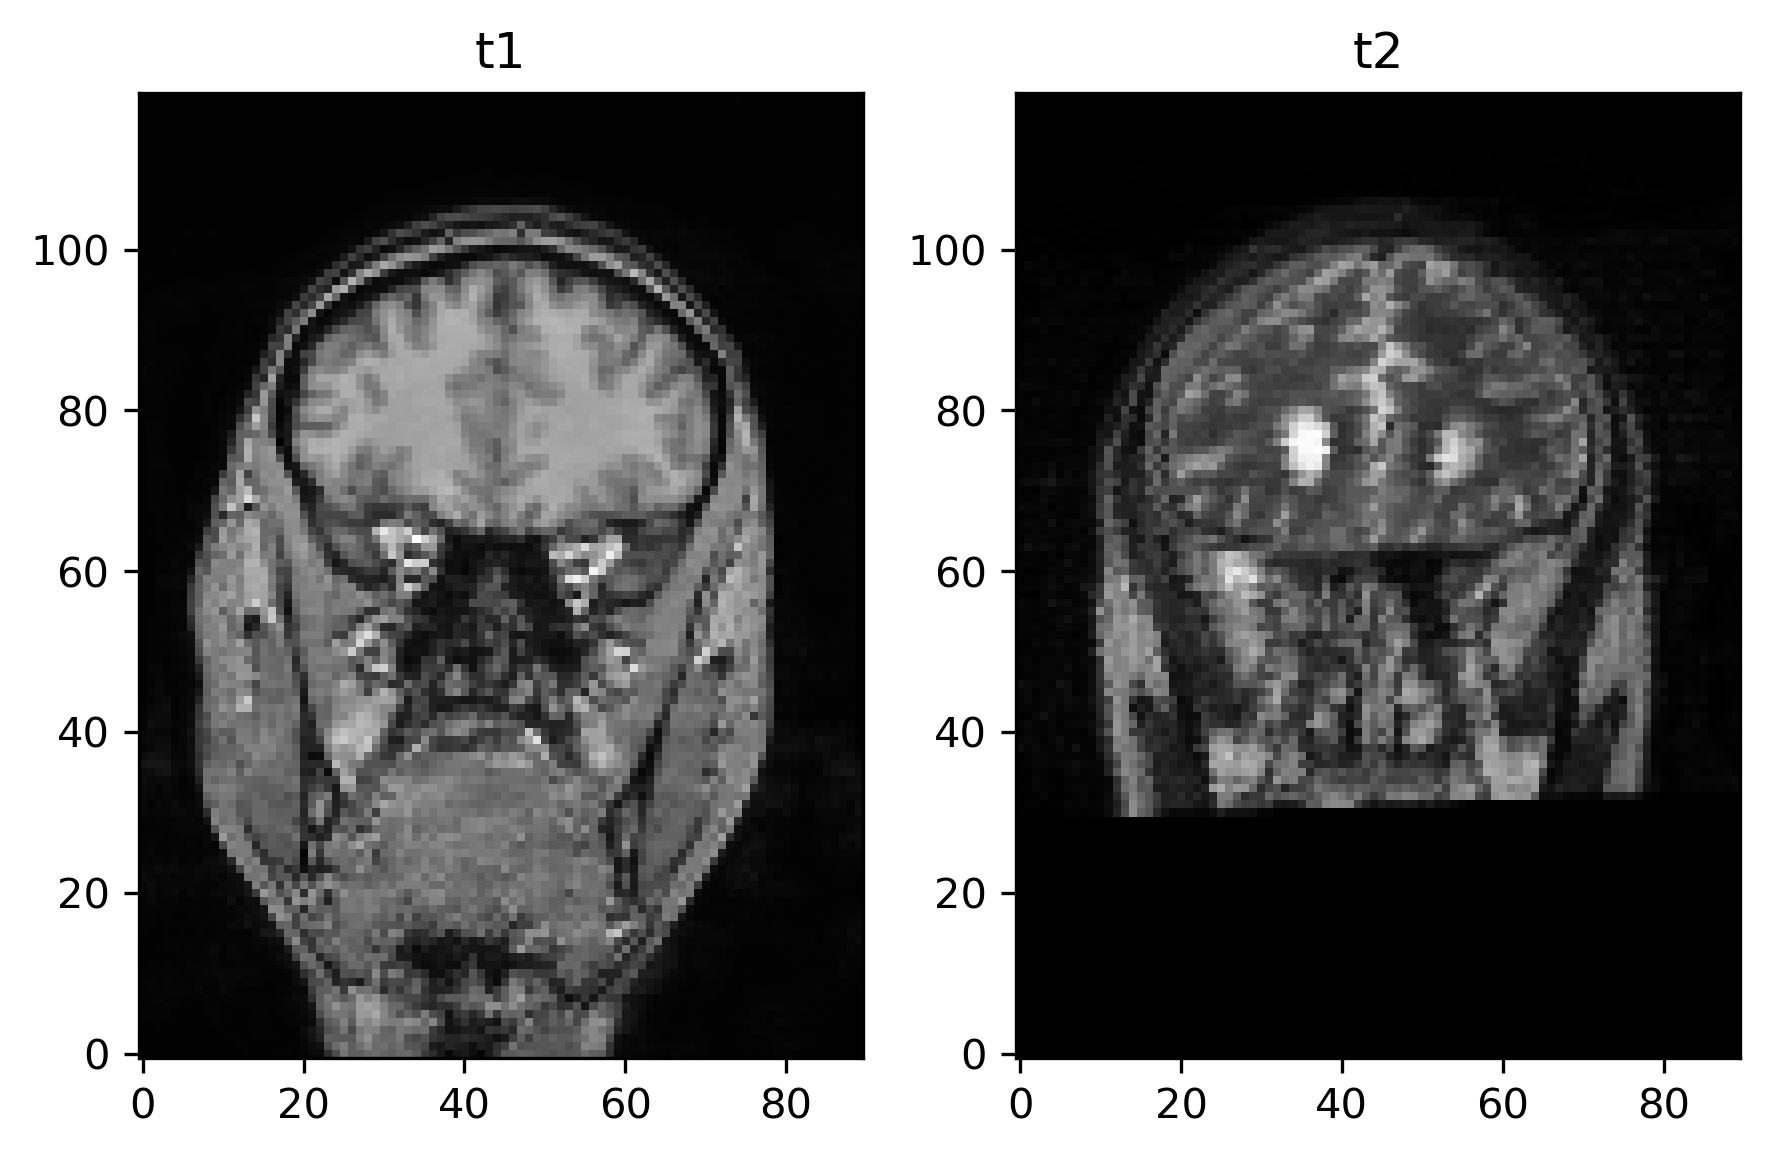

In [8]:
with plt.rc_context({"figure.dpi": 300}):
    slice_t1 = image_t1_data[42, :, :].T
    slice_t2 = image_t2_data[42, :, :].T
    show_slices([slice_t1, slice_t2], titles=['t1', 't2'])